In [7]:
import pandas as pd
import numpy as np

In [8]:
def prepare_new_samples_n(n2):
    n2=n2.T
    n2=n2.reset_index()
    n2=n2.iloc[1:]
    n2.columns = ['Central_wavelength', 'RT']
    return n2

In [9]:
n2=pd.read_csv('new_2.csv')
n3=pd.read_csv('new_3.csv')
n4=pd.read_csv('new_4.csv')
n5=pd.read_csv('new_5.csv')
n6=pd.read_csv('new_6.csv')
n7=pd.read_csv('new_7.csv')
n8=pd.read_csv('new_8.csv')
n9=pd.read_csv('new_9.csv')
n10=pd.read_csv('new_10.csv')
n11=pd.read_csv('new_11.csv')
n12=pd.read_csv('new_12.csv')

In [10]:
n2=prepare_new_samples_n(n2)
n3=prepare_new_samples_n(n3)
n4=prepare_new_samples_n(n4)
n5=prepare_new_samples_n(n5)
n6=prepare_new_samples_n(n6)
n7=prepare_new_samples_n(n7)
n8=prepare_new_samples_n(n8)
n9=prepare_new_samples_n(n9)
n10=prepare_new_samples_n(n10)
n11=prepare_new_samples_n(n11)
n12=prepare_new_samples_n(n12)

In [11]:
m1=pd.read_csv('new_samples_features.csv')
m2=pd.read_csv('new_samples_features_2.csv')
m3=pd.read_csv('new_samples_features_3.csv')
m4=pd.read_csv('new_samples_features_4.csv')
m5=pd.read_csv('new_samples_features_5.csv')
m6=pd.read_csv('new_samples_features_6.csv')
m7=pd.read_csv('new_samples_features_7.csv')
m8=pd.read_csv('new_samples_features_8.csv')
m9=pd.read_csv('new_samples_features_9.csv')
m10=pd.read_csv('new_samples_features_10.csv')
m11=pd.read_csv('new_samples_features_11.csv')
m12=pd.read_csv('new_samples_features_12.csv')

In [12]:
m1.rename(columns={"R_scence": "R_scene"},inplace=True)
m2.rename(columns={"R_scence": "R_scene"},inplace=True)
m3.rename(columns={"R_scence": "R_scene"},inplace=True)
m2.drop(columns=['mprime_a_bin','mprime_g_bin'],inplace=True)
m3.drop(columns=['mprime_a_bin','mprime_g_bin'],inplace=True)

In [13]:
def calculate_alpha(Tg_abs,Ta_abs,delta_g_scat,delta_a_scat,BOA_RT,Mg,Ma):     
    numerator= (1000/BOA_RT)*(Tg_abs**(Mg))*(Ta_abs**(Ma))-1
    denominator=(delta_g_scat * Mg) + (delta_a_scat * Ma) / 3
    alpha= numerator / denominator
    return alpha

In [14]:
def prepare_samples_m(m2,n2):
    m2['BOA_RT']=n2['RT'].values
    m2['alpha'] = m2.apply(lambda row: calculate_alpha(row['Tg_abs'],row['Ta_abs'],row['GOD'],row['AODS'],row['BOA_RT'],row['mprime_g'],row['mprime_a']), axis=1)
    return m2

In [15]:
for i in range(2, 13):  # m2 à m5
    m_var = f"m{i}"
    n_var = f"n{i}"
    locals()[m_var] = prepare_samples_m(locals()[m_var], locals()[n_var])

In [16]:
m11

,Tg_scat,Tg_abs,Ta_abs,SSA,GOD,AOD,AODS,SZA,Z,R_scene,g1,Cos(SZA),mu_g,mu_a,muprime_g,muprime_a,mprime_g,mprime_a,BOA_RT,alpha
0,0.700177,0.996633,0.979355,0.952953,0.356422,0.443398,0.422537,88.0,520.0,0.99,0.899265,0.034899,707.946667,3185.76,0.049215,0.038925,19.178172,19.808435,359.453056,0.075328
1,0.705562,0.997046,0.979431,0.952886,0.348761,0.441122,0.420339,88.0,520.0,0.99,0.898916,0.034899,707.946667,3185.76,0.049215,0.038925,19.178172,19.808435,362.44167,0.076834
2,0.710843,0.996835,0.979506,0.952818,0.341304,0.438861,0.418154,88.0,520.0,0.99,0.898567,0.034899,707.946667,3185.76,0.049215,0.038925,19.178172,19.808435,363.371221,0.077189
3,0.716019,0.997149,0.979600,0.952797,0.334048,0.436643,0.416032,88.0,520.0,0.99,0.898218,0.034899,707.946667,3185.76,0.049215,0.038925,19.178172,19.808435,365.943339,0.078643
4,0.721094,0.996654,0.979680,0.952744,0.326985,0.434425,0.413896,88.0,520.0,0.99,0.897869,0.034899,707.946667,3185.76,0.049215,0.038925,19.178172,19.808435,365.815103,0.078514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.999800,0.197184,0.994500,0.827687,0.000200,0.032007,0.026492,88.0,520.0,0.99,0.892167,0.034899,707.946667,3185.76,0.049215,0.038925,19.178172,19.808435,0.287869,-5.594244
996,0.999800,0.083891,0.994500,0.827621,0.000200,0.031995,0.026479,88.0,520.0,0.99,0.892305,0.034899,707.946667,3185.76,0.049215,0.038925,19.178172,19.808435,0.080471,-5.596773
997,0.999800,0.046852,0.994500,0.827130,0.000200,0.031904,0.026389,88.0,520.0,0.99,0.892443,0.034899,707.946667,3185.76,0.049215,0.038925,19.178172,19.808435,0.037394,-5.615625
998,0.999800,0.221548,0.994500,0.827130,0.000200,0.031904,0.026388,88.0,520.0,0.99,0.892580,0.034899,707.946667,3185.76,0.049215,0.038925,19.178172,19.808435,0.350501,-5.615660


### Select data with lowest precision :

In [17]:
m1_vi=m1.iloc[:190]
m2_vi=m2.iloc[:190]
m3_vi=m3.iloc[:190]
m4_vi=m4.iloc[:190]
m5_vi=m5.iloc[:190]
m6_vi=m6.iloc[:190]
m7_vi=m7.iloc[:190]
m8_vi=m8.iloc[:190]
m9_vi=m9.iloc[:190]
m10_vi=m10.iloc[:190]
m11_vi=m11.iloc[:190]
m12_vi=m12.iloc[:190]

In [18]:
m=pd.concat([m1_vi,m2_vi,m3_vi,m4_vi,m5_vi,m6_vi,m7_vi,m8_vi,m9_vi,m10_vi,m11_vi,m12_vi],ignore_index=True)
m

,Tg_scat,Tg_abs,Ta_abs,SSA,GOD,AOD,AODS,SZA,Z,R_scene,g1,Cos(SZA),mu_g,mu_a,muprime_g,muprime_a,mprime_g,mprime_a,BOA_RT,alpha
0,0.700177,0.996633,0.979355,0.952953,0.356422,0.443398,0.422537,43.0,120.0,0.44,0.899265,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,756.14202,0.425436
1,0.705562,0.997046,0.979431,0.952886,0.348761,0.441122,0.420339,43.0,120.0,0.33,0.898916,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,760.039985,0.423998
2,0.710843,0.996835,0.979506,0.952818,0.341304,0.438861,0.418154,43.0,120.0,0.44,0.898567,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,763.205746,0.422639
3,0.716019,0.997149,0.979600,0.952797,0.334048,0.436643,0.416032,43.0,120.0,0.44,0.898218,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,766.900471,0.421195
4,0.721094,0.996654,0.979680,0.952744,0.326985,0.434425,0.413896,43.0,120.0,0.44,0.897869,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,769.642902,0.419869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2275,0.977859,0.971583,0.984200,0.920525,0.022389,0.200392,0.184466,30.0,100.0,0.35,0.948858,0.866025,707.900000,3185.55,0.866229,0.866071,1.141673,1.098328,935.65286,0.174404
2276,0.978092,0.976634,0.984124,0.919828,0.022152,0.199612,0.183609,30.0,100.0,0.35,0.948804,0.866025,707.900000,3185.55,0.866229,0.866071,1.141673,1.098328,941.244047,0.174159
2277,0.978318,0.988455,0.984100,0.919393,0.021920,0.198837,0.182810,30.0,100.0,0.35,0.948751,0.866025,707.900000,3185.55,0.866229,0.866071,1.141673,1.098328,954.30924,0.174361
2278,0.978547,0.974484,0.984100,0.919084,0.021687,0.198078,0.182051,30.0,100.0,0.35,0.948697,0.866025,707.900000,3185.55,0.866229,0.866071,1.141673,1.098328,939.154643,0.172685


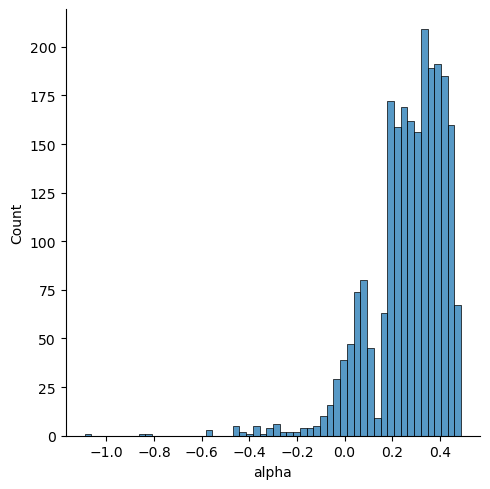

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.displot(m['alpha'])

In [20]:
m['BOA_RT']=m['BOA_RT'].astype(float)

##### We will duplicate data in order to make modele more robust in this range of values :

In [21]:
y=m['alpha']
X=m.drop(columns=['alpha','BOA_RT'])
z=m['BOA_RT']

n_copies = 120
X_augmented = []
y_augmented = []
z_augmented = []

for _ in range(n_copies):
    noise = np.random.normal(loc=0.0, scale=0.01, size=X.shape)  # petit bruit
    X_aug = X.values + noise
    X_augmented.append(X)
    y_augmented.append(y.values)
    z_augmented.append(z.values)
    

# Concaténer
X_augmented = pd.DataFrame(np.vstack(X_augmented), columns=X.columns)
y_augmented = pd.Series(np.hstack(y_augmented))
z_augmented = pd.Series(np.hstack(z_augmented))

X = pd.concat([X, X_augmented], ignore_index=True)
y = pd.concat([y, y_augmented], ignore_index=True)
z = pd.concat([z, z_augmented], ignore_index=True)

In [22]:
X

,Tg_scat,Tg_abs,Ta_abs,SSA,GOD,AOD,AODS,SZA,Z,R_scene,g1,Cos(SZA),mu_g,mu_a,muprime_g,muprime_a,mprime_g,mprime_a
0,0.700177,0.996633,0.979355,0.952953,0.356422,0.443398,0.422537,43.0,120.0,0.44,0.899265,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525
1,0.705562,0.997046,0.979431,0.952886,0.348761,0.441122,0.420339,43.0,120.0,0.33,0.898916,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525
2,0.710843,0.996835,0.979506,0.952818,0.341304,0.438861,0.418154,43.0,120.0,0.44,0.898567,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525
3,0.716019,0.997149,0.979600,0.952797,0.334048,0.436643,0.416032,43.0,120.0,0.44,0.898218,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525
4,0.721094,0.996654,0.979680,0.952744,0.326985,0.434425,0.413896,43.0,120.0,0.44,0.897869,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275875,0.977859,0.971583,0.984200,0.920525,0.022389,0.200392,0.184466,30.0,100.0,0.35,0.948858,0.866025,707.900000,3185.55,0.866229,0.866071,1.141673,1.098328
275876,0.978092,0.976634,0.984124,0.919828,0.022152,0.199612,0.183609,30.0,100.0,0.35,0.948804,0.866025,707.900000,3185.55,0.866229,0.866071,1.141673,1.098328
275877,0.978318,0.988455,0.984100,0.919393,0.021920,0.198837,0.182810,30.0,100.0,0.35,0.948751,0.866025,707.900000,3185.55,0.866229,0.866071,1.141673,1.098328
275878,0.978547,0.974484,0.984100,0.919084,0.021687,0.198078,0.182051,30.0,100.0,0.35,0.948697,0.866025,707.900000,3185.55,0.866229,0.866071,1.141673,1.098328


In [23]:
X['alpha']=y.values
X['BOA_RT']=z.values

##### Add the other split of data :

In [24]:
m1_li=m1.iloc[190:]
m2_li=m2.iloc[190:]
m3_li=m3.iloc[190:]
m4_li=m4.iloc[190:]
m5_li=m5.iloc[190:]
m6_li=m6.iloc[190:]
m7_li=m7.iloc[190:]
m8_li=m8.iloc[190:]
m9_li=m9.iloc[190:]
m10_li=m10.iloc[190:]
m11_li=m11.iloc[190:]
m12_li=m12.iloc[190:]

In [25]:
X=pd.concat([X,m1_li,m2_li,m3_li,m4_li,m5_li,m6_li,m7_li,m8_li,m9_li,m12_li],ignore_index=True)
X

,Tg_scat,Tg_abs,Ta_abs,SSA,GOD,AOD,AODS,SZA,Z,R_scene,g1,Cos(SZA),mu_g,mu_a,muprime_g,muprime_a,mprime_g,mprime_a,alpha,BOA_RT
0,0.700177,0.996633,0.979355,0.952953,0.356422,0.443398,0.422537,43.0,120.0,0.44,0.899265,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,0.425436,756.14202
1,0.705562,0.997046,0.979431,0.952886,0.348761,0.441122,0.420339,43.0,120.0,0.33,0.898916,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,0.423998,760.039985
2,0.710843,0.996835,0.979506,0.952818,0.341304,0.438861,0.418154,43.0,120.0,0.44,0.898567,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,0.422639,763.205746
3,0.716019,0.997149,0.979600,0.952797,0.334048,0.436643,0.416032,43.0,120.0,0.44,0.898218,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,0.421195,766.900471
4,0.721094,0.996654,0.979680,0.952744,0.326985,0.434425,0.413896,43.0,120.0,0.44,0.897869,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,0.419869,769.642902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283975,0.999800,0.197184,0.994500,0.827687,0.000200,0.032007,0.026492,30.0,100.0,0.35,0.892167,0.866025,707.900000,3185.55,0.866229,0.866071,1.141673,1.098328,-5.024579,163.894399
283976,0.999800,0.083891,0.994500,0.827621,0.000200,0.031995,0.026479,30.0,100.0,0.35,0.892305,0.866025,707.900000,3185.55,0.866229,0.866071,1.141673,1.098328,-7.703867,63.553654
283977,0.999800,0.046852,0.994500,0.827130,0.000200,0.031904,0.026389,30.0,100.0,0.35,0.892443,0.866025,707.900000,3185.55,0.866229,0.866071,1.141673,1.098328,-9.534091,33.326369
283978,0.999800,0.221548,0.994500,0.827130,0.000200,0.031904,0.026388,30.0,100.0,0.35,0.892580,0.866025,707.900000,3185.55,0.866229,0.866071,1.141673,1.098328,-4.678761,186.501561


In [26]:
m_li=pd.concat([m10_li,m11_li],ignore_index=True)
y_li=m_li['alpha']
X_li=m_li.drop(columns=['alpha','BOA_RT'])
z_li=m_li['BOA_RT']

n_copies = 70
X_augmented = []
y_augmented = []
z_augmented = []

for _ in range(n_copies):
    noise = np.random.normal(loc=0.0, scale=0.01, size=X_li.shape)  # petit bruit
    X_aug = X_li.values + noise
    X_augmented.append(X_li)
    y_augmented.append(y_li.values)
    z_augmented.append(z_li.values)
    

# Concaténer
X_augmented = pd.DataFrame(np.vstack(X_augmented), columns=X_li.columns)
y_augmented = pd.Series(np.hstack(y_augmented))
z_augmented = pd.Series(np.hstack(z_augmented))

X_li = pd.concat([X_li, X_augmented], ignore_index=True)
y_li = pd.concat([y_li, y_augmented], ignore_index=True)
z_li = pd.concat([z_li, z_augmented], ignore_index=True)

X_li['alpha']=y_li.values
X_li['BOA_RT']=z_li.values

In [27]:
X=pd.concat([X,X_li],ignore_index=True)
X

,Tg_scat,Tg_abs,Ta_abs,SSA,GOD,AOD,AODS,SZA,Z,R_scene,g1,Cos(SZA),mu_g,mu_a,muprime_g,muprime_a,mprime_g,mprime_a,alpha,BOA_RT
0,0.700177,0.996633,0.979355,0.952953,0.356422,0.443398,0.422537,43.0,120.0,0.44,0.899265,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,0.425436,756.14202
1,0.705562,0.997046,0.979431,0.952886,0.348761,0.441122,0.420339,43.0,120.0,0.33,0.898916,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,0.423998,760.039985
2,0.710843,0.996835,0.979506,0.952818,0.341304,0.438861,0.418154,43.0,120.0,0.44,0.898567,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,0.422639,763.205746
3,0.716019,0.997149,0.979600,0.952797,0.334048,0.436643,0.416032,43.0,120.0,0.44,0.898218,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,0.421195,766.900471
4,0.721094,0.996654,0.979680,0.952744,0.326985,0.434425,0.413896,43.0,120.0,0.44,0.897869,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,0.419869,769.642902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398995,0.999800,0.197184,0.994500,0.827687,0.000200,0.032007,0.026492,88.0,520.0,0.99,0.892167,0.034899,707.946667,3185.76,0.049215,0.038925,19.178172,19.808435,-5.594244,0.287869
398996,0.999800,0.083891,0.994500,0.827621,0.000200,0.031995,0.026479,88.0,520.0,0.99,0.892305,0.034899,707.946667,3185.76,0.049215,0.038925,19.178172,19.808435,-5.596773,0.080471
398997,0.999800,0.046852,0.994500,0.827130,0.000200,0.031904,0.026389,88.0,520.0,0.99,0.892443,0.034899,707.946667,3185.76,0.049215,0.038925,19.178172,19.808435,-5.615625,0.037394
398998,0.999800,0.221548,0.994500,0.827130,0.000200,0.031904,0.026388,88.0,520.0,0.99,0.892580,0.034899,707.946667,3185.76,0.049215,0.038925,19.178172,19.808435,-5.615660,0.350501


In [28]:
X.to_csv('add_training.csv',index=False)

In [131]:
X['R_scene'].unique()

array([0.44, 0.33, 0.67, 0.8 , 0.54, 0.15, 0.3 , 0.73, 0.1 , 0.95, 0.99])

In [138]:
m10

,Tg_scat,Tg_abs,Ta_abs,SSA,GOD,AOD,AODS,SZA,Z,R_scene,g1,Cos(SZA),mu_g,mu_a,muprime_g,muprime_a,mprime_g,mprime_a,BOA_RT,alpha
0,0.700177,0.996633,0.979355,0.952953,0.356422,0.443398,0.422537,88.0,0.0,0.95,0.899265,0.034899,707.888889,3185.5,0.049216,0.038926,20.318507,25.689959,345.220508,0.053653
1,0.705562,0.997046,0.979431,0.952886,0.348761,0.441122,0.420339,88.0,0.0,0.95,0.898916,0.034899,707.888889,3185.5,0.049216,0.038926,20.318507,25.689959,348.096861,0.054844
2,0.710843,0.996835,0.979506,0.952818,0.341304,0.438861,0.418154,88.0,0.0,0.95,0.898567,0.034899,707.888889,3185.5,0.049216,0.038926,20.318507,25.689959,348.986628,0.054997
3,0.716019,0.997149,0.979600,0.952797,0.334048,0.436643,0.416032,88.0,0.0,0.95,0.898218,0.034899,707.888889,3185.5,0.049216,0.038926,20.318507,25.689959,351.460726,0.056148
4,0.721094,0.996654,0.979680,0.952744,0.326985,0.434425,0.413896,88.0,0.0,0.95,0.897869,0.034899,707.888889,3185.5,0.049216,0.038926,20.318507,25.689959,351.332208,0.055862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.999800,0.197184,0.994500,0.827687,0.000200,0.032007,0.026492,88.0,0.0,0.95,0.892167,0.034899,707.888889,3185.5,0.049216,0.038926,20.318507,25.689959,0.172156,-4.330499
996,0.999800,0.083891,0.994500,0.827621,0.000200,0.031995,0.026479,88.0,0.0,0.95,0.892305,0.034899,707.888889,3185.5,0.049216,0.038926,20.318507,25.689959,0.039905,-4.332465
997,0.999800,0.046852,0.994500,0.827130,0.000200,0.031904,0.026389,88.0,0.0,0.95,0.892443,0.034899,707.888889,3185.5,0.049216,0.038926,20.318507,25.689959,0.016363,-4.347116
998,0.999800,0.221548,0.994500,0.827130,0.000200,0.031904,0.026388,88.0,0.0,0.95,0.892580,0.034899,707.888889,3185.5,0.049216,0.038926,20.318507,25.689959,0.214222,-4.347143


In [165]:
X['R_scene'].unique()

array([0.44, 0.33, 0.67, 0.8 , 0.54, 0.15, 0.3 , 0.73, 0.1 , 0.95, 0.99])

In [166]:
X['Z'].unique()

array([120., 890.,  59.,  10.,   0.,  17.,  78., 250., 520.])

In [167]:
X['SZA'].unique()

array([43., 63., 15., 60., 75., 22., 84., 42., 88.])

In [5]:
X=pd.read_csv('add_training.csv')
X

,Tg_scat,Tg_abs,Ta_abs,SSA,GOD,AOD,AODS,SZA,Z,R_scene,g1,Cos(SZA),mu_g,mu_a,muprime_g,muprime_a,mprime_g,mprime_a,alpha,BOA_RT
0,0.700177,0.996633,0.979355,0.952953,0.356422,0.443398,0.422537,43.0,120.0,0.44,0.899265,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,0.425436,756.142020
1,0.705562,0.997046,0.979431,0.952886,0.348761,0.441122,0.420339,43.0,120.0,0.33,0.898916,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,0.423998,760.039985
2,0.710843,0.996835,0.979506,0.952818,0.341304,0.438861,0.418154,43.0,120.0,0.44,0.898567,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,0.422639,763.205746
3,0.716019,0.997149,0.979600,0.952797,0.334048,0.436643,0.416032,43.0,120.0,0.44,0.898218,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,0.421195,766.900471
4,0.721094,0.996654,0.979680,0.952744,0.326985,0.434425,0.413896,43.0,120.0,0.44,0.897869,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,0.419869,769.642902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301795,0.999800,0.197184,0.994500,0.827687,0.000200,0.032007,0.026492,88.0,520.0,0.99,0.892167,0.034899,707.946667,3185.76,0.049215,0.038925,19.178172,19.808435,NaN,NaN
301796,0.999800,0.083891,0.994500,0.827621,0.000200,0.031995,0.026479,88.0,520.0,0.99,0.892305,0.034899,707.946667,3185.76,0.049215,0.038925,19.178172,19.808435,NaN,NaN
301797,0.999800,0.046852,0.994500,0.827130,0.000200,0.031904,0.026389,88.0,520.0,0.99,0.892443,0.034899,707.946667,3185.76,0.049215,0.038925,19.178172,19.808435,NaN,NaN
301798,0.999800,0.221548,0.994500,0.827130,0.000200,0.031904,0.026388,88.0,520.0,0.99,0.892580,0.034899,707.946667,3185.76,0.049215,0.038925,19.178172,19.808435,NaN,NaN


In [6]:
m11

,Tg_scat,Tg_abs,Ta_abs,SSA,GOD,AOD,AODS,SZA,Z,R_scene,g1,Cos(SZA),mu_g,mu_a,muprime_g,muprime_a,mprime_g,mprime_a
0,0.700177,0.996633,0.979355,0.952953,0.356422,0.443398,0.422537,88.0,520.0,0.99,0.899265,0.034899,707.946667,3185.76,0.049215,0.038925,19.178172,19.808435
1,0.705562,0.997046,0.979431,0.952886,0.348761,0.441122,0.420339,88.0,520.0,0.99,0.898916,0.034899,707.946667,3185.76,0.049215,0.038925,19.178172,19.808435
2,0.710843,0.996835,0.979506,0.952818,0.341304,0.438861,0.418154,88.0,520.0,0.99,0.898567,0.034899,707.946667,3185.76,0.049215,0.038925,19.178172,19.808435
3,0.716019,0.997149,0.979600,0.952797,0.334048,0.436643,0.416032,88.0,520.0,0.99,0.898218,0.034899,707.946667,3185.76,0.049215,0.038925,19.178172,19.808435
4,0.721094,0.996654,0.979680,0.952744,0.326985,0.434425,0.413896,88.0,520.0,0.99,0.897869,0.034899,707.946667,3185.76,0.049215,0.038925,19.178172,19.808435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.999800,0.197184,0.994500,0.827687,0.000200,0.032007,0.026492,88.0,520.0,0.99,0.892167,0.034899,707.946667,3185.76,0.049215,0.038925,19.178172,19.808435
996,0.999800,0.083891,0.994500,0.827621,0.000200,0.031995,0.026479,88.0,520.0,0.99,0.892305,0.034899,707.946667,3185.76,0.049215,0.038925,19.178172,19.808435
997,0.999800,0.046852,0.994500,0.827130,0.000200,0.031904,0.026389,88.0,520.0,0.99,0.892443,0.034899,707.946667,3185.76,0.049215,0.038925,19.178172,19.808435
998,0.999800,0.221548,0.994500,0.827130,0.000200,0.031904,0.026388,88.0,520.0,0.99,0.892580,0.034899,707.946667,3185.76,0.049215,0.038925,19.178172,19.808435


In [29]:
m10

,Tg_scat,Tg_abs,Ta_abs,SSA,GOD,AOD,AODS,SZA,Z,R_scene,g1,Cos(SZA),mu_g,mu_a,muprime_g,muprime_a,mprime_g,mprime_a,BOA_RT,alpha
0,0.700177,0.996633,0.979355,0.952953,0.356422,0.443398,0.422537,88.0,0.0,0.95,0.899265,0.034899,707.888889,3185.5,0.049216,0.038926,20.318507,25.689959,345.220508,0.053653
1,0.705562,0.997046,0.979431,0.952886,0.348761,0.441122,0.420339,88.0,0.0,0.95,0.898916,0.034899,707.888889,3185.5,0.049216,0.038926,20.318507,25.689959,348.096861,0.054844
2,0.710843,0.996835,0.979506,0.952818,0.341304,0.438861,0.418154,88.0,0.0,0.95,0.898567,0.034899,707.888889,3185.5,0.049216,0.038926,20.318507,25.689959,348.986628,0.054997
3,0.716019,0.997149,0.979600,0.952797,0.334048,0.436643,0.416032,88.0,0.0,0.95,0.898218,0.034899,707.888889,3185.5,0.049216,0.038926,20.318507,25.689959,351.460726,0.056148
4,0.721094,0.996654,0.979680,0.952744,0.326985,0.434425,0.413896,88.0,0.0,0.95,0.897869,0.034899,707.888889,3185.5,0.049216,0.038926,20.318507,25.689959,351.332208,0.055862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.999800,0.197184,0.994500,0.827687,0.000200,0.032007,0.026492,88.0,0.0,0.95,0.892167,0.034899,707.888889,3185.5,0.049216,0.038926,20.318507,25.689959,0.172156,-4.330499
996,0.999800,0.083891,0.994500,0.827621,0.000200,0.031995,0.026479,88.0,0.0,0.95,0.892305,0.034899,707.888889,3185.5,0.049216,0.038926,20.318507,25.689959,0.039905,-4.332465
997,0.999800,0.046852,0.994500,0.827130,0.000200,0.031904,0.026389,88.0,0.0,0.95,0.892443,0.034899,707.888889,3185.5,0.049216,0.038926,20.318507,25.689959,0.016363,-4.347116
998,0.999800,0.221548,0.994500,0.827130,0.000200,0.031904,0.026388,88.0,0.0,0.95,0.892580,0.034899,707.888889,3185.5,0.049216,0.038926,20.318507,25.689959,0.214222,-4.347143
